In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import sys
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import scipy.stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

#for exporting to Adobe Illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [3]:
from pylab import plot, show, savefig, xlim, figure, hold, ylim, legend, boxplot, setp, axes

linewidth_for_box = 1.5

# function for setting the colors of the box plots pairs
def setBoxColors(bp , color):
    setp(bp['boxes'][0], color=color , linewidth = linewidth_for_box)
    setp(bp['caps'][0], color=color , linewidth = linewidth_for_box)
    setp(bp['caps'][1], color=color , linewidth = linewidth_for_box)
    setp(bp['whiskers'][0], color=color , linewidth = linewidth_for_box)
    setp(bp['whiskers'][1], color=color , linewidth = linewidth_for_box)
    setp(bp['fliers'][0], color=color)
    setp(bp['medians'][0], color='k' , linewidth = 1.5)
    bp['fliers'][0].set_markerfacecolor('black')
    bp['fliers'][0].set_markeredgewidth(0.35)
    bp['fliers'][0].set_markersize(3.65)
    bp['fliers'][0].set_markeredgecolor('white')
    bp['fliers'][0].set_alpha(0.85)
    
def plot_SNV_Ratio_for_gene_category(gene_category , color , x_pos, ax):
    
    # create new DF that combines Ess & Non-Ess gene categories
    subset_homoplasic_variants_genes_Ess_Non_Ess_combined = subset_homoplasic_SNPs_genes.copy()
    new_gene_categories = []
    for gene_category_i in subset_homoplasic_variants_genes_Ess_Non_Ess_combined.gene_category:
        if (gene_category_i == 'Essential') or (gene_category_i == 'Non-Essential'):
            new_gene_categories.append('Essential_or_Non-Essential')
        else:
            new_gene_categories.append(gene_category_i)
    subset_homoplasic_variants_genes_Ess_Non_Ess_combined.loc[:,'gene_category'] = new_gene_categories
    
    #make boxplot
    Var_Ratio_values = list(subset_homoplasic_variants_genes_Ess_Non_Ess_combined[subset_homoplasic_variants_genes_Ess_Non_Ess_combined.gene_category == gene_category].SNV_Mut_event_Num_isolates_ratio)
    bp = ax.boxplot(Var_Ratio_values , positions = [ind[x_pos]], widths = box_width)
    setBoxColors(bp , color)
    
    return [len(Var_Ratio_values), round(subset_homoplasic_variants_genes_Ess_Non_Ess_combined[subset_homoplasic_variants_genes_Ess_Non_Ess_combined.gene_category == gene_category].SNV_Mut_event_Num_isolates_ratio.median(), 3)]

def plot_non_HT_INDEL_Ratio_for_gene_category(gene_category , color , x_pos, ax):
    
    # create new DF that combines Ess & Non-Ess gene categories
    subset_homoplasic_variants_genes_Ess_Non_Ess_combined = subset_homoplasic_non_HT_INDELs_genes.copy()
    new_gene_categories = []
    for gene_category_i in subset_homoplasic_variants_genes_Ess_Non_Ess_combined.gene_category:
        if (gene_category_i == 'Essential') or (gene_category_i == 'Non-Essential'):
            new_gene_categories.append('Essential_or_Non-Essential')
        else:
            new_gene_categories.append(gene_category_i)
    subset_homoplasic_variants_genes_Ess_Non_Ess_combined.loc[:,'gene_category'] = new_gene_categories
    
    #make boxplot
    Var_Ratio_values = list(subset_homoplasic_variants_genes_Ess_Non_Ess_combined[subset_homoplasic_variants_genes_Ess_Non_Ess_combined.gene_category == gene_category].INDEL_Mut_event_Num_isolates_ratio)
    bp = ax.boxplot(Var_Ratio_values , positions = [ind[x_pos]], widths = box_width)
    setBoxColors(bp , color)
    
    return [len(Var_Ratio_values), round(subset_homoplasic_variants_genes_Ess_Non_Ess_combined[subset_homoplasic_variants_genes_Ess_Non_Ess_combined.gene_category == gene_category].INDEL_Mut_event_Num_isolates_ratio.median(), 3)]

def plot_HT_INDEL_Ratio_for_gene_category(gene_category , color , x_pos, ax):
    
    # create new DF that combines Ess & Non-Ess gene categories
    subset_homoplasic_variants_genes_Ess_Non_Ess_combined = subset_homoplasic_HT_INDELs_genes.copy()
    new_gene_categories = []
    for gene_category_i in subset_homoplasic_variants_genes_Ess_Non_Ess_combined.gene_category:
        if (gene_category_i == 'Essential') or (gene_category_i == 'Non-Essential'):
            new_gene_categories.append('Essential_or_Non-Essential')
        else:
            new_gene_categories.append(gene_category_i)
    subset_homoplasic_variants_genes_Ess_Non_Ess_combined.loc[:,'gene_category'] = new_gene_categories
    
    #make boxplot
    Var_Ratio_values = list(subset_homoplasic_variants_genes_Ess_Non_Ess_combined[subset_homoplasic_variants_genes_Ess_Non_Ess_combined.gene_category == gene_category].INDEL_Mut_event_Num_isolates_ratio)
    bp = ax.boxplot(Var_Ratio_values , positions = [ind[x_pos]], widths = box_width)
    setBoxColors(bp , color)
    
    return [len(Var_Ratio_values), round(subset_homoplasic_variants_genes_Ess_Non_Ess_combined[subset_homoplasic_variants_genes_Ess_Non_Ess_combined.gene_category == gene_category].INDEL_Mut_event_Num_isolates_ratio.median(), 3)]

In [4]:
plt.style.use('ggplot')
plt.rcParams['lines.linewidth']=0
plt.rcParams['axes.facecolor']='1.0'
plt.rcParams['xtick.color']='black'
plt.rcParams['axes.grid']=False
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['grid.color']= '1.0'
plt.rcParams.update({'font.size': 10})
plt.rc('font', family='serif')

####################################################################################################################################################################################

# [1] Load in Homoplasy Scores from *SNPPar* for SNPs

####################################################################################################################################################################################

In [5]:
#load in SNPs
all_homoplasic_SNPs = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/homoplasies_detected_in_global_lineages/SNP homoplasies from SNPPar/homoplasy_count_across_lineages.pkl')

In [6]:
all_homoplasic_SNPs.head()

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,2,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt
0,2155168.0,C,G,G,Rv1908c,944,Antibiotic Resistance,N,S315T,203,408,297,306,310,179,8,6,1717,katG,8066
1,761155.0,C,T,T,Rv0667,1349,Antibiotic Resistance,N,S450L,75,415,199,222,311,173,8,3,1406,rpoB,5706
2,781687.0,A,G,G,Rv0682,128,Antibiotic Resistance,N,K43R,37,463,102,65,53,51,6,2,779,rpsL,3509
4,4247429.0,A,G,G,Rv3795,916,Antibiotic Resistance,N,M306V,32,406,67,76,99,60,2,1,743,embB,2102
6,7582.0,A,G,G,Rv0006,281,Antibiotic Resistance,N,D94G,10,320,67,77,53,25,0,0,552,gyrA,844


In [7]:
np.shape(all_homoplasic_SNPs)

(834981, 20)

Note - SNPs & INDELs with homoplasy score $ = 0$ were dropped from DataFrames

#### mark *mmpR* (Rv0678)  & *glpK* (Rv3696c) as an Antibiotic Resistance gene

In [8]:
all_homoplasic_SNPs.loc[all_homoplasic_SNPs['gene_id'] == 'Rv0678', 'gene_category'] = 'Antibiotic Resistance'
all_homoplasic_SNPs.loc[all_homoplasic_SNPs['gene_id'] == 'Rv0678', 'gene_name'] = 'mmpR'

all_homoplasic_SNPs.loc[all_homoplasic_SNPs['gene_id'] == 'Rv3696c', 'gene_category'] = 'Antibiotic Resistance'

####################################################################################################################################################################################

# [2] Load in Homoplasy Scores from *TopDis (spacer length = 4)* for INDELs

####################################################################################################################################################################################

In [9]:
#load in INDELs
all_homoplasic_INDELs = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/homoplasies_detected_in_global_lineages/INDEL homoplasies/homoplasy_count_across_lineages_spacer_4.pkl')

In [10]:
all_homoplasic_INDELs.head()

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,1,2,3,4A,4B,4C,5,6,total,num_isolates
47371,4408100,GC,G,Antibiotic Resistance,gid,Rv3919c,103,del,frameshift,35,...,41.0,27.0,51.0,43.0,11.0,29.0,0.0,0.0,202.0,388
47365,4408087,CG,C,Antibiotic Resistance,gid,Rv3919c,116,del,frameshift,39,...,23.0,11.0,35.0,33.0,10.0,18.0,0.0,0.0,130.0,212
47313,4407851,GC,G,Antibiotic Resistance,gid,Rv3919c,352,del,frameshift,118,...,21.0,9.0,40.0,20.0,6.0,19.0,0.0,0.0,115.0,182
25151,2288850,A,ACC,Antibiotic Resistance,pncA,Rv2043c,392,ins,frameshift,131,...,1.0,14.0,6.0,3.0,6.0,2.0,0.0,0.0,32.0,48
47315,4407851,G,GC,Antibiotic Resistance,gid,Rv3919c,352,ins,frameshift,118,...,5.0,1.0,12.0,5.0,7.0,1.0,0.0,0.0,31.0,52


In [11]:
np.shape(all_homoplasic_INDELs)

(46306, 22)

Note - SNPs & INDELs with homoplasy score $ = 0$ were dropped from DataFrames

#### mark *mmpR* (Rv0678) as an Antibiotic Resistance gene

In [12]:
all_homoplasic_INDELs.loc[all_homoplasic_INDELs['gene_id'] == 'Rv0678', 'gene_category'] = 'Antibiotic Resistance'
all_homoplasic_INDELs.loc[all_homoplasic_INDELs['gene_id'] == 'Rv0678', 'gene_name'] = 'mmpR'

all_homoplasic_INDELs.loc[all_homoplasic_INDELs['gene_id'] == 'Rv3696c', 'gene_category'] = 'Antibiotic Resistance'

## [2.1] Separate INDELs into those occcurring in HT regions, SSR regions and those not in either

### HT

In [13]:
homopolymeric_regions_from_Luca = pd.read_csv('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/comparison_with_homopolymeric_regions/homopolymer regions from Luca/list_homopolymers_7bpmore_pure.csv')

create a set of all Reference Positions that occur within a Homopolymeric Tract

In [14]:
all_HT_ref_postions = []
for HT_i_start, HT_i_end in zip(homopolymeric_regions_from_Luca.chromStart, homopolymeric_regions_from_Luca.chromEnd):
    
    HT_i_ref_positions = range(HT_i_start, HT_i_end+1)
    all_HT_ref_postions = all_HT_ref_postions + HT_i_ref_positions
    
all_HT_ref_postions = set(all_HT_ref_postions)

In [15]:
len(all_HT_ref_postions)

1160

### SSR

In [16]:
SSR_H37Rv_df = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/simple_sequence_repeat_regions/SSR_H37Rv_2-6bp_at_least_3_repeats.pkl')

In [17]:
SSR_H37Rv_df.head()

,H37Rv_start,H37Rv_end,motif,repeats
0,561,569,CGC,3
1,562,570,GCC,3
2,643,648,AC,3
3,1121,1126,GC,3
4,1408,1413,CA,3


In [18]:
H37Rv_SSR_positions_list = []
for SSR_i_start, SSR_i_end in zip(SSR_H37Rv_df.H37Rv_start, SSR_H37Rv_df.H37Rv_end):
    
    SSR_i_H37Rv_coords = list(np.arange(SSR_i_start, SSR_i_end + 1))
    
    H37Rv_SSR_positions_list = H37Rv_SSR_positions_list + SSR_i_H37Rv_coords
    
H37Rv_SSR_positions_list = list(set(H37Rv_SSR_positions_list)) # remove duplicate positions from overlapping SSR regions

#### Start at -1bp relative to the SSR track since that's where variants are usually called

In [19]:
SSR_H37Rv_df.loc[:, 'H37Rv_start'] = SSR_H37Rv_df.H37Rv_start - 1

In [20]:
SSR_H37Rv_df.head()

,H37Rv_start,H37Rv_end,motif,repeats
0,560,569,CGC,3
1,561,570,GCC,3
2,642,648,AC,3
3,1120,1126,GC,3
4,1407,1413,CA,3


**Note:** use this list when sorting INDEL variants that occur within an SSR region

In [17]:
H37Rv_SSR_positions_list = []
for SSR_i_start, SSR_i_end in zip(SSR_H37Rv_df.H37Rv_start, SSR_H37Rv_df.H37Rv_end):
    
    SSR_i_H37Rv_coords = list(np.arange(SSR_i_start, SSR_i_end + 1))
    
    H37Rv_SSR_positions_list = H37Rv_SSR_positions_list + SSR_i_H37Rv_coords
    
H37Rv_SSR_positions_list = list(set(H37Rv_SSR_positions_list)) # remove duplicate positions from overlapping SSR regions

In [18]:
len(H37Rv_SSR_positions_list)

112673

set of all Reference Positions that occur within a SSR region (including positions at -1bp relative to SSR region)

In [19]:
H37Rv_SSR_positions = set(H37Rv_SSR_positions_list)

In [20]:
len(H37Rv_SSR_positions)

112673

### Annotate each INDEL based on whether it is in a SSR or HR or other

iterate through all INDELs and figure out which occur in SSR and those that don't

In [21]:
repeat_region_list = []
for indel_i_pos in all_homoplasic_INDELs.pos:
    
    if indel_i_pos in all_HT_ref_postions:
        repeat_region_list.append('HT')
    
    elif indel_i_pos in H37Rv_SSR_positions:
        repeat_region_list.append('SSR')
        
    else:
        repeat_region_list.append('no')
        
all_homoplasic_INDELs.loc[:,'repeat_region'] = repeat_region_list

In [22]:
all_homoplasic_INDELs.head()

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,2,3,4A,4B,4C,5,6,total,num_isolates,repeat_region
47371,4408100,GC,G,Antibiotic Resistance,gid,Rv3919c,103,del,frameshift,35,...,27.0,51.0,43.0,11.0,29.0,0.0,0.0,202.0,388,no
47365,4408087,CG,C,Antibiotic Resistance,gid,Rv3919c,116,del,frameshift,39,...,11.0,35.0,33.0,10.0,18.0,0.0,0.0,130.0,212,no
47313,4407851,GC,G,Antibiotic Resistance,gid,Rv3919c,352,del,frameshift,118,...,9.0,40.0,20.0,6.0,19.0,0.0,0.0,115.0,182,SSR
25151,2288850,A,ACC,Antibiotic Resistance,pncA,Rv2043c,392,ins,frameshift,131,...,14.0,6.0,3.0,6.0,2.0,0.0,0.0,32.0,48,no
47315,4407851,G,GC,Antibiotic Resistance,gid,Rv3919c,352,ins,frameshift,118,...,1.0,12.0,5.0,7.0,1.0,0.0,0.0,31.0,52,SSR


################################################################################################################################################

# [3] Calculate the ratio of $\frac{\text{independent mutation events}}{\text{number of isolates with mutation}}$ SNVs in our dataset

################################################################################################################################################

### Subset to mutations that have a homoplasy score $\ge 5$ (~0.5% of SNV mutations) AND have an allele frequency $\ge 0.1\%$ in the Mtb sample (N=31,428)

In [23]:
mut_AF_threshold = int(np.ceil(float(31428) * 0.001))
print(mut_AF_threshold)

32


In [28]:
#subset to (SNVs in that have a HP score >= 5) AND (SNVs in which mutant AF >= 0.1%)
subset_homoplasic_SNPs = all_homoplasic_SNPs[(all_homoplasic_SNPs.total >= 5) & (all_homoplasic_SNPs.num_isolates_alt >= mut_AF_threshold)]
subset_homoplasic_SNPs.sort_values(by='total',inplace=True,ascending=False)
subset_homoplasic_SNPs.reset_index(inplace=True,drop=True)

/home/rv76/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
np.shape(subset_homoplasic_SNPs)

(1525, 20)

In [30]:
subset_homoplasic_SNPs.head()

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,2,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt
0,2155168.0,C,G,G,Rv1908c,944,Antibiotic Resistance,N,S315T,203,408,297,306,310,179,8,6,1717,katG,8066
1,761155.0,C,T,T,Rv0667,1349,Antibiotic Resistance,N,S450L,75,415,199,222,311,173,8,3,1406,rpoB,5706
2,781687.0,A,G,G,Rv0682,128,Antibiotic Resistance,N,K43R,37,463,102,65,53,51,6,2,779,rpsL,3509
3,1673425.0,C,T,T,Rv1482c_Rv1483,None,None,I,None,168,202,62,111,114,87,5,3,752,Rv1482c_fabG1,2660
4,4247429.0,A,G,G,Rv3795,916,Antibiotic Resistance,N,M306V,32,406,67,76,99,60,2,1,743,embB,2102


### Compute (Mutation Event) / (Number of Mutants) Ratio

In [31]:
subset_homoplasic_SNPs.loc[: , 'SNV_Mut_event_Num_isolates_ratio'] = subset_homoplasic_SNPs.loc[: , 'total'].astype(float) / subset_homoplasic_SNPs.loc[: , 'num_isolates_alt'].astype(float)

/home/rv76/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/rv76/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [32]:
subset_homoplasic_SNPs.head()

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,...,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt,SNV_Mut_event_Num_isolates_ratio
0,2155168.0,C,G,G,Rv1908c,944,Antibiotic Resistance,N,S315T,203,...,297,306,310,179,8,6,1717,katG,8066,0.212869
1,761155.0,C,T,T,Rv0667,1349,Antibiotic Resistance,N,S450L,75,...,199,222,311,173,8,3,1406,rpoB,5706,0.246407
2,781687.0,A,G,G,Rv0682,128,Antibiotic Resistance,N,K43R,37,...,102,65,53,51,6,2,779,rpsL,3509,0.222001
3,1673425.0,C,T,T,Rv1482c_Rv1483,None,None,I,None,168,...,62,111,114,87,5,3,752,Rv1482c_fabG1,2660,0.282707
4,4247429.0,A,G,G,Rv3795,916,Antibiotic Resistance,N,M306V,32,...,67,76,99,60,2,1,743,embB,2102,0.353473


In [33]:
np.shape(subset_homoplasic_SNPs)

(1525, 21)

### output table

In [34]:
subset_homoplasic_SNPs.to_excel('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/for publication/SNPPar_SNV_homoplasy_count_across_lineages.xlsx')

### Subset to mutations that occur within a gene classified as *Essential*, *Non-Essential*, *Antigen*, *Antibiotic Resistance* or *PE/PPE*

**Note** - mutations in RNA or intergenic regions are classifed as _None_ for Gene Category and are not included in plots

In [35]:
subset_homoplasic_SNPs_gene_cat_filter = [gene_category_mut_i in ['Essential','Non-Essential','Antigen','Antibiotic Resistance','PE/PPE'] for gene_category_mut_i in subset_homoplasic_SNPs.gene_category]
subset_homoplasic_SNPs_genes = subset_homoplasic_SNPs[subset_homoplasic_SNPs_gene_cat_filter]

In [36]:
np.shape(subset_homoplasic_SNPs_genes)

(1208, 21)

## [3.1] Histogram

In [37]:
subset_homoplasic_SNPs_genes.SNV_Mut_event_Num_isolates_ratio.max()

0.9459459459459459

In [38]:
def fig_SNV_RCR_A(ax):

    #split arrays by gene category
    subset_homoplasic_SNPs_Ess = subset_homoplasic_SNPs_genes[subset_homoplasic_SNPs_genes.gene_category == 'Essential'].SNV_Mut_event_Num_isolates_ratio
    subset_homoplasic_SNPs_Non_Ess = subset_homoplasic_SNPs_genes[subset_homoplasic_SNPs_genes.gene_category == 'Non-Essential'].SNV_Mut_event_Num_isolates_ratio
    subset_homoplasic_SNPs_Ant = subset_homoplasic_SNPs_genes[subset_homoplasic_SNPs_genes.gene_category == 'Antigen'].SNV_Mut_event_Num_isolates_ratio
    subset_homoplasic_SNPs_AR = subset_homoplasic_SNPs_genes[subset_homoplasic_SNPs_genes.gene_category == 'Antibiotic Resistance'].SNV_Mut_event_Num_isolates_ratio
    subset_homoplasic_SNPs_PE_PPE = subset_homoplasic_SNPs_genes[subset_homoplasic_SNPs_genes.gene_category == 'PE/PPE'].SNV_Mut_event_Num_isolates_ratio
    
    # combine Ess & Non-Ess
    subset_homoplasic_SNPs_Ess_and_Non_Ess = pd.concat([subset_homoplasic_SNPs_Ess, subset_homoplasic_SNPs_Non_Ess])

    n , bins , patches = ax.hist([subset_homoplasic_SNPs_Ess_and_Non_Ess, subset_homoplasic_SNPs_Ant, subset_homoplasic_SNPs_AR, subset_homoplasic_SNPs_PE_PPE] , bins = 20 , color = ['xkcd:grey','xkcd:red','xkcd:green','xkcd:purple'] , stacked = True , rwidth = 1.0 , edgecolor='white', linewidth=0.75)

    ax.set_xlabel('Hs / # Mutants', fontsize = 10, color = 'k', labelpad = 1)
    ax.set_ylabel('Number of SNVs (N={0})'.format(str(np.shape(subset_homoplasic_SNPs_genes)[0])), fontsize = 10, color = 'k', labelpad = 1)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(labelcolor = 'k')
    ax.set_xlim([-0.005, 0.96])

    ax.tick_params(axis='y', which='major', labelsize=10 , labelcolor = 'k')
    ax.tick_params(axis='x', which='major', labelsize=10 , labelcolor = 'k')
    ax.tick_params(colors = 'k', which = 'both')

    #create legend
    Ess_and_Non_Ess = 'xkcd:grey'
    Ant = 'xkcd:red'
    AR = 'xkcd:green'
    PE_PPE = 'xkcd:purple'

    handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [Ess_and_Non_Ess,Ant,AR,PE_PPE]]
    labels = ["Essential & Non-Essential","Antigen","Antibiotic Resistance","PE/PPE"]
    ax.legend(handles, labels, fontsize=8)

In [39]:
def fig_SNV_RCR_B(ax):

    #split arrays by gene category
    subset_homoplasic_SNPs_Ess = subset_homoplasic_SNPs_genes[subset_homoplasic_SNPs_genes.gene_category == 'Essential'].SNV_Mut_event_Num_isolates_ratio
    subset_homoplasic_SNPs_Non_Ess = subset_homoplasic_SNPs_genes[subset_homoplasic_SNPs_genes.gene_category == 'Non-Essential'].SNV_Mut_event_Num_isolates_ratio
    subset_homoplasic_SNPs_Ant = subset_homoplasic_SNPs_genes[subset_homoplasic_SNPs_genes.gene_category == 'Antigen'].SNV_Mut_event_Num_isolates_ratio
    subset_homoplasic_SNPs_AR = subset_homoplasic_SNPs_genes[subset_homoplasic_SNPs_genes.gene_category == 'Antibiotic Resistance'].SNV_Mut_event_Num_isolates_ratio
    subset_homoplasic_SNPs_PE_PPE = subset_homoplasic_SNPs_genes[subset_homoplasic_SNPs_genes.gene_category == 'PE/PPE'].SNV_Mut_event_Num_isolates_ratio
    
    # combine Ess & Non-Ess
    subset_homoplasic_SNPs_Ess_and_Non_Ess = pd.concat([subset_homoplasic_SNPs_Ess, subset_homoplasic_SNPs_Non_Ess])

    n , bins , patches = ax.hist([subset_homoplasic_SNPs_Ess_and_Non_Ess[subset_homoplasic_SNPs_Ess_and_Non_Ess >= 0.3], subset_homoplasic_SNPs_Ant[subset_homoplasic_SNPs_Ant >= 0.3], subset_homoplasic_SNPs_AR[subset_homoplasic_SNPs_AR >= 0.3], subset_homoplasic_SNPs_PE_PPE[subset_homoplasic_SNPs_PE_PPE >= 0.3]] , bins = 20 , color = ['xkcd:grey','xkcd:red','xkcd:green','xkcd:purple'] , stacked = True , rwidth = 1.0 , edgecolor='white', linewidth=0.75)

    ax.set_xlabel('Hs / # Mutants', fontsize = 10, color = 'k', labelpad = 1)
    ax.set_ylabel('Number of SNVs (N={0})'.format(str(np.shape(subset_homoplasic_SNPs_genes[subset_homoplasic_SNPs_genes.SNV_Mut_event_Num_isolates_ratio >= 0.3])[0])), fontsize = 10, color = 'k', labelpad = 1)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(labelcolor = 'k')
    ax.set_xlim([0.295, 0.96])
    ax.set_xticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9])

    ax.tick_params(axis='y', which='major', labelsize=10 , labelcolor = 'k')
    ax.tick_params(axis='x', which='major', labelsize=10 , labelcolor = 'k')
    ax.tick_params(colors = 'k', which = 'both')

## [3.2] Boxplot

In [40]:
box_width = 0.8
ind = [1,2,3,4]
gene_categories = ['Essential_or_Non-Essential', 'Antigen', 'Antibiotic Resistance', 'PE/PPE']
    
def fig_SNV_RCR_C(ax):
    
    gene_category_label_dict = {'Essential_or_Non-Essential':'Ess. & Non-Ess.', 'Antigen':'Ant.', 'Antibiotic Resistance':'A.R.', 'PE/PPE':'PE/PPE'}

    #bottom plot
    num_variants = []
    median_ratios = []
    x_pos = 0
    for gene_category , color in zip( gene_categories , ['xkcd:grey','xkcd:red','xkcd:green','xkcd:purple'] ):

        #plot boxplot for lineage & store the number of isolates in sample
        num_variants_i, median_ratio_i = plot_SNV_Ratio_for_gene_category(gene_category , color , x_pos, ax)
        num_variants.append(num_variants_i)
        median_ratios.append(median_ratio_i)
        x_pos += 1

    ax.set_xlim(0.5 , 4.5) #x-axis
    ax.set_ylim(-0.01 , 0.96) #y-axis

    ax.set_xticks(ind)
    ax.set_xticklabels([], rotation='horizontal', fontsize = 6)
    x_labels = [gene_category_label_dict[gene_category] + '\n (N=' + str(num_var) + ')' + '\n (M=' + str(med_rat) + ')' for gene_category,num_var,med_rat in zip(gene_categories,num_variants,median_ratios)]
    ax.set_xticklabels(x_labels, rotation='horizontal', fontsize = 7)
    ax.grid(False)
    ax.set_ylabel('Hs / # Mutants', fontsize = 10, color = 'k', labelpad = 1)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='on') # labels along the bottom edge are off

    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        right='off',         # ticks along the top edge are off
        labelleft='on') # labels along the bottom edge are off

    ax.tick_params(colors = 'k', which = 'both')

In [41]:
gene_categories_list = ['Essential_or_Non-Essential' , 'Antigen' , 'PE/PPE' , 'Antibiotic Resistance']
MW_U_tests_DF = pd.DataFrame(index = gene_categories_list , columns = gene_categories_list) #DF to store p-values from Mann-Whitney U-tests

# redefine col that combines Ess & Non-Ess gene categories
subset_homoplasic_variants_genes_Ess_Non_Ess_combined = subset_homoplasic_SNPs_genes.copy()
new_gene_categories = []
for gene_category_i in subset_homoplasic_variants_genes_Ess_Non_Ess_combined.gene_category:
    if (gene_category_i == 'Essential') or (gene_category_i == 'Non-Essential'):
        new_gene_categories.append('Essential_or_Non-Essential')
    else:
        new_gene_categories.append(gene_category_i)
subset_homoplasic_variants_genes_Ess_Non_Ess_combined.loc[:,'gene_category'] = new_gene_categories

for gene_category_i in MW_U_tests_DF.index:
    
    #get Variant Ratio for genes in category i
    I_Var_Ratio_values = subset_homoplasic_variants_genes_Ess_Non_Ess_combined[subset_homoplasic_variants_genes_Ess_Non_Ess_combined.gene_category == gene_category_i].SNV_Mut_event_Num_isolates_ratio
    
    for gene_category_j in MW_U_tests_DF.columns:
        
        #get Variant Ratio for genes in category j
        J_Var_Ratio_values = subset_homoplasic_variants_genes_Ess_Non_Ess_combined[subset_homoplasic_variants_genes_Ess_Non_Ess_combined.gene_category == gene_category_j].SNV_Mut_event_Num_isolates_ratio
        
        #Mann Whitney U test for differences in AF changes between both categories
        non_parametric_test_pval = scipy.stats.mannwhitneyu(I_Var_Ratio_values , J_Var_Ratio_values)[1]
        MW_U_tests_DF.loc[gene_category_i , gene_category_j] = non_parametric_test_pval

In [42]:
MW_U_tests_DF

,Essential_or_Non-Essential,Antigen,PE/PPE,Antibiotic Resistance
Essential_or_Non-Essential,0.499972,0.405979,0.0184545,5.69274e-33
Antigen,0.405979,0.499647,0.125928,1.58747e-17
PE/PPE,0.0184545,0.125928,0.499873,1.08035e-19
Antibiotic Resistance,5.69274e-33,1.58747e-17,1.08035e-19,0.499763


In [43]:
subset_homoplasic_SNPs_genes.sort_values(by = 'SNV_Mut_event_Num_isolates_ratio', ascending = False).head(n = 10)

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,...,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt,SNV_Mut_event_Num_isolates_ratio
349,761128.0,C,T,T,Rv0667,1322,Antibiotic Resistance,N,S441L,6,...,2,4,3,4,0,0,35,rpoB,37,0.945946
423,4238385.0,G,A,A,Rv3792,454,Essential,N,G152R,0,...,0,0,0,29,0,0,29,aftA,32,0.906250
352,2288933.0,G,C,C,Rv2043c,309,Antibiotic Resistance,N,Y103*,0,...,0,1,12,1,1,0,34,pncA,38,0.894737
373,1339512.0,T,C,C,Rv1196,164,PE/PPE,N,V55A,3,...,2,8,6,4,2,0,32,PPE18,36,0.888889
398,1339511.0,G,A,A,Rv1196,163,PE/PPE,N,V55M,3,...,2,8,6,3,2,0,31,PPE18,35,0.885714
357,7581.0,G,C,C,Rv0006,280,Antibiotic Resistance,N,D94H,0,...,0,8,5,4,0,0,34,gyrA,39,0.871795
366,2289040.0,A,G,G,Rv2043c,202,Antibiotic Resistance,N,W68R,0,...,1,2,3,2,0,0,33,pncA,38,0.868421
297,437226.0,C,G,G,Rv0358,367,Non-Essential,N,P123A,7,...,10,2,18,3,0,0,41,Rv0358,48,0.854167
442,3774261.0,C,T,T,Rv3363c,244,Non-Essential,N,V82M,1,...,1,1,5,3,0,0,27,Rv3363c,33,0.818182
89,761095.0,T,C,C,Rv0667,1289,Antibiotic Resistance,N,L430P,7,...,18,9,9,8,0,0,113,rpoB,139,0.812950


################################################################################################################################################

# [4] Calculate the ratio of $\frac{\text{independent mutation events}}{\text{number of isolates with mutation}}$ non-HT INDELs in our dataset

################################################################################################################################################

### Subset to mutations that have a homoplasy score $\ge 5$ (~3.01% of INDEL mutations) AND have an allele frequency $\ge 0.1\%$ in the Mtb sample (N=31,428)

In [24]:
mut_AF_threshold = int(np.ceil(float(31428) * 0.001))
print(mut_AF_threshold)

32


### Output table that contains *all* INDELs (HT, SSR and other) that have $Hs \ge 5$ and Alternate $AF \ge 0.1%$

In [25]:
# subset to (INDELs in that have a HP score >= 5) AND (INDELs in which mutant AF >= 0.1%)
subset_homoplasic_INDELs_export = all_homoplasic_INDELs[(all_homoplasic_INDELs.total >= 5) & (all_homoplasic_INDELs.num_isolates >= mut_AF_threshold)]

# compute recency ratio
subset_homoplasic_INDELs_export.loc[: , 'INDEL_Mut_event_Num_isolates_ratio'] = subset_homoplasic_INDELs_export.loc[: , 'total'] / subset_homoplasic_INDELs_export.loc[: , 'num_isolates'].astype(float)

# change col type
convert_dict = {'1':int,'2':int,'3':int,'4A':int,'4B':int,'4C':int,'5':int,'6':int,'total':int}
subset_homoplasic_INDELs_export = subset_homoplasic_INDELs_export.astype(convert_dict)

/home/rv76/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/rv76/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [26]:
subset_homoplasic_INDELs_export.head()

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,3,4A,4B,4C,5,6,total,num_isolates,repeat_region,INDEL_Mut_event_Num_isolates_ratio
47371,4408100,GC,G,Antibiotic Resistance,gid,Rv3919c,103,del,frameshift,35,...,51,43,11,29,0,0,202,388,no,0.520619
47365,4408087,CG,C,Antibiotic Resistance,gid,Rv3919c,116,del,frameshift,39,...,35,33,10,18,0,0,130,212,no,0.613208
47313,4407851,GC,G,Antibiotic Resistance,gid,Rv3919c,352,del,frameshift,118,...,40,20,6,19,0,0,115,182,SSR,0.631868
25151,2288850,A,ACC,Antibiotic Resistance,pncA,Rv2043c,392,ins,frameshift,131,...,6,3,6,2,0,0,32,48,no,0.666667
47315,4407851,G,GC,Antibiotic Resistance,gid,Rv3919c,352,ins,frameshift,118,...,12,5,7,1,0,0,31,52,SSR,0.596154


In [27]:
subset_homoplasic_INDELs_export.shape

(655, 24)

INDELs that caused frameshifts within open reading frames

In [30]:
INDEL_FS_filter = np.array([('_' not in gene_id) and (indel_type == 'frameshift') and (gene_cat != 'None') for gene_id, indel_type, gene_cat in zip(subset_homoplasic_INDELs_export.gene_id, subset_homoplasic_INDELs_export.INDEL_type, subset_homoplasic_INDELs_export.gene_category)])
FS_ORF_homoplasic_INDELs = subset_homoplasic_INDELs_export[INDEL_FS_filter]

In [32]:
FS_ORF_homoplasic_INDELs.shape

(352, 24)

In [ ]:
FS_ORF_homoplasic_INDELs.head(n=3)

In [36]:
FS_ORF_homoplasic_INDELs[FS_ORF_homoplasic_INDELs.repeat_region == 'HT'].shape

(94, 24)

In [49]:
subset_homoplasic_INDELs_export.to_excel('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/for publication/TopDis_INDEL_homoplasy_count_across_lineages.xlsx')

### Subset to all INDELs that are not in *HT* regions

In [211]:
#subset to (INDELs in that have a HP score >= 5) AND (INDELs in which mutant AF >= 0.1%)
subset_homoplasic_INDELs = all_homoplasic_INDELs[(all_homoplasic_INDELs.total >= 5) & (all_homoplasic_INDELs.num_isolates >= mut_AF_threshold)]

# subset to those INDELs that DO NOT occur within HT regions
subset_homoplasic_non_HT_INDELs = subset_homoplasic_INDELs[subset_homoplasic_INDELs.repeat_region != 'HT']
subset_homoplasic_non_HT_INDELs.sort_values(by='total',inplace=True,ascending=False)
subset_homoplasic_non_HT_INDELs.reset_index(inplace=True,drop=True)

/home/rv76/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [212]:
np.shape(subset_homoplasic_non_HT_INDELs)

(523, 23)

In [213]:
subset_homoplasic_non_HT_INDELs.head()

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,2,3,4A,4B,4C,5,6,total,num_isolates,repeat_region
0,3131469,T,TTGTCGGCGA,Antigen,Rv2823c,Rv2823c,305,ins,inframe,102,...,377.0,183.0,351.0,367.0,88.0,5.0,5.0,1534.0,5093,no
1,1894300,G,GGTCTTGCCGC,Non-Essential,Rv1668c,Rv1668c,1043,ins,frameshift,348,...,306.0,205.0,288.0,313.0,210.0,11.0,5.0,1488.0,12599,no
2,968426,A,AGCCGGGTTG,PE/PPE,PE_PGRS15,Rv0872c,1819,ins,inframe,607,...,345.0,118.0,275.0,302.0,147.0,3.0,3.0,1331.0,2943,no
3,2137521,A,ACTCCGATCAC,Non-Essential,Rv1888c,Rv1888c,559,ins,frameshift,187,...,278.0,185.0,261.0,287.0,1.0,5.0,4.0,1155.0,12566,no
4,1313337,A,AG,None,Rv1179c_pks3,Rv1179c_Rv1180,None,ins,frameshift,None,...,195.0,65.0,129.0,124.0,104.0,0.0,1.0,674.0,16070,no


### Compute (Mutation Event) / (Number of Mutants) Ratio

In [214]:
subset_homoplasic_non_HT_INDELs.loc[: , 'INDEL_Mut_event_Num_isolates_ratio'] = subset_homoplasic_non_HT_INDELs.loc[: , 'total'] / subset_homoplasic_non_HT_INDELs.loc[: , 'num_isolates'].astype(float)

In [215]:
subset_homoplasic_non_HT_INDELs.head()

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,3,4A,4B,4C,5,6,total,num_isolates,repeat_region,INDEL_Mut_event_Num_isolates_ratio
0,3131469,T,TTGTCGGCGA,Antigen,Rv2823c,Rv2823c,305,ins,inframe,102,...,183.0,351.0,367.0,88.0,5.0,5.0,1534.0,5093,no,0.301198
1,1894300,G,GGTCTTGCCGC,Non-Essential,Rv1668c,Rv1668c,1043,ins,frameshift,348,...,205.0,288.0,313.0,210.0,11.0,5.0,1488.0,12599,no,0.118105
2,968426,A,AGCCGGGTTG,PE/PPE,PE_PGRS15,Rv0872c,1819,ins,inframe,607,...,118.0,275.0,302.0,147.0,3.0,3.0,1331.0,2943,no,0.452260
3,2137521,A,ACTCCGATCAC,Non-Essential,Rv1888c,Rv1888c,559,ins,frameshift,187,...,185.0,261.0,287.0,1.0,5.0,4.0,1155.0,12566,no,0.091915
4,1313337,A,AG,None,Rv1179c_pks3,Rv1179c_Rv1180,None,ins,frameshift,None,...,65.0,129.0,124.0,104.0,0.0,1.0,674.0,16070,no,0.041942


In [216]:
np.shape(subset_homoplasic_non_HT_INDELs)

(523, 24)

### Subset to mutations that occur within a gene classified as *Essential*, *Non-Essential*, *Antigen*, *Antibiotic Resistance* or *PE/PPE*

**Note** - mutations in RNA or intergenic regions are classifed as _None_ for Gene Category and are not included in plots

In [220]:
subset_homoplasic_non_HT_INDELs_gene_cat_filter = [gene_category_mut_i in ['Essential','Non-Essential','Antigen','Antibiotic Resistance','PE/PPE'] for gene_category_mut_i in subset_homoplasic_non_HT_INDELs.gene_category]
subset_homoplasic_non_HT_INDELs_genes = subset_homoplasic_non_HT_INDELs[subset_homoplasic_non_HT_INDELs_gene_cat_filter]

In [221]:
np.shape(subset_homoplasic_non_HT_INDELs_genes)

(388, 24)

## [4.1] Histogram

In [222]:
subset_homoplasic_non_HT_INDELs_genes.INDEL_Mut_event_Num_isolates_ratio.max()

0.7333333333333333

In [223]:
def fig_INDEL_non_HT_RCR_D(ax):

    #split arrays by gene category
    subset_homoplasic_INDELs_Ess = subset_homoplasic_non_HT_INDELs_genes[subset_homoplasic_non_HT_INDELs_genes.gene_category == 'Essential'].INDEL_Mut_event_Num_isolates_ratio
    subset_homoplasic_INDELs_Non_Ess = subset_homoplasic_non_HT_INDELs_genes[subset_homoplasic_non_HT_INDELs_genes.gene_category == 'Non-Essential'].INDEL_Mut_event_Num_isolates_ratio
    subset_homoplasic_INDELs_Ant = subset_homoplasic_non_HT_INDELs_genes[subset_homoplasic_non_HT_INDELs_genes.gene_category == 'Antigen'].INDEL_Mut_event_Num_isolates_ratio
    subset_homoplasic_INDELs_AR = subset_homoplasic_non_HT_INDELs_genes[subset_homoplasic_non_HT_INDELs_genes.gene_category == 'Antibiotic Resistance'].INDEL_Mut_event_Num_isolates_ratio
    subset_homoplasic_INDELs_PE_PPE = subset_homoplasic_non_HT_INDELs_genes[subset_homoplasic_non_HT_INDELs_genes.gene_category == 'PE/PPE'].INDEL_Mut_event_Num_isolates_ratio
    
    # combine Ess & Non-Ess
    subset_homoplasic_INDELs_Ess_and_Non_Ess = pd.concat([subset_homoplasic_INDELs_Ess, subset_homoplasic_INDELs_Non_Ess])

    n , bins , patches = ax.hist([subset_homoplasic_INDELs_Ess_and_Non_Ess, subset_homoplasic_INDELs_Ant, subset_homoplasic_INDELs_AR, subset_homoplasic_INDELs_PE_PPE] , bins = 20 , color = ['xkcd:grey','xkcd:red','xkcd:green','xkcd:purple'] , stacked = True , rwidth = 1.0 , edgecolor='white', linewidth=0.75)

    ax.set_xlabel('Hs / # Mutants', fontsize = 10, color = 'k', labelpad = 1)
    ax.set_ylabel('Number of non-HT INDELs (N={0})'.format(str(np.shape(subset_homoplasic_non_HT_INDELs_genes)[0])), fontsize = 10, color = 'k', labelpad = 1)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(labelcolor = 'k')
    ax.set_xlim([-0.005, 0.75])

    ax.tick_params(axis='y', which='major', labelsize=10 , labelcolor = 'k')
    ax.tick_params(axis='x', which='major', labelsize=10 , labelcolor = 'k')
    ax.tick_params(colors = 'k', which = 'both')

In [224]:
def fig_INDEL_non_HT_RCR_E(ax):

    #split arrays by gene category
    subset_homoplasic_INDELs_Ess = subset_homoplasic_non_HT_INDELs_genes[subset_homoplasic_non_HT_INDELs_genes.gene_category == 'Essential'].INDEL_Mut_event_Num_isolates_ratio
    subset_homoplasic_INDELs_Non_Ess = subset_homoplasic_non_HT_INDELs_genes[subset_homoplasic_non_HT_INDELs_genes.gene_category == 'Non-Essential'].INDEL_Mut_event_Num_isolates_ratio
    subset_homoplasic_INDELs_Ant = subset_homoplasic_non_HT_INDELs_genes[subset_homoplasic_non_HT_INDELs_genes.gene_category == 'Antigen'].INDEL_Mut_event_Num_isolates_ratio
    subset_homoplasic_INDELs_AR = subset_homoplasic_non_HT_INDELs_genes[subset_homoplasic_non_HT_INDELs_genes.gene_category == 'Antibiotic Resistance'].INDEL_Mut_event_Num_isolates_ratio
    subset_homoplasic_INDELs_PE_PPE = subset_homoplasic_non_HT_INDELs_genes[subset_homoplasic_non_HT_INDELs_genes.gene_category == 'PE/PPE'].INDEL_Mut_event_Num_isolates_ratio
    
    # combine Ess & Non-Ess
    subset_homoplasic_INDELs_Ess_and_Non_Ess = pd.concat([subset_homoplasic_INDELs_Ess, subset_homoplasic_INDELs_Non_Ess])
    
    n , bins , patches = ax.hist([subset_homoplasic_INDELs_Ess_and_Non_Ess[subset_homoplasic_INDELs_Ess_and_Non_Ess >= 0.3], subset_homoplasic_INDELs_Ant[subset_homoplasic_INDELs_Ant >= 0.3], subset_homoplasic_INDELs_AR[subset_homoplasic_INDELs_AR >= 0.3], subset_homoplasic_INDELs_PE_PPE[subset_homoplasic_INDELs_PE_PPE >= 0.3]] , bins = 20 , color = ['xkcd:grey','xkcd:red','xkcd:green','xkcd:purple'] , stacked = True , rwidth = 1.0 , edgecolor='white', linewidth=0.75)

    ax.set_xlabel('Hs / # Mutants', fontsize = 10, color = 'k', labelpad = 1)
    ax.set_ylabel('Number of non-HT INDELs (N={0})'.format(str(np.shape(subset_homoplasic_non_HT_INDELs_genes[subset_homoplasic_non_HT_INDELs_genes.INDEL_Mut_event_Num_isolates_ratio >= 0.3])[0])), fontsize = 10, color = 'k', labelpad = 1)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(labelcolor = 'k')
    ax.set_xlim([0.295, 0.75])
    ax.set_xticks([0.3,0.4,0.5,0.6,0.7])

    ax.tick_params(axis='y', which='major', labelsize=10 , labelcolor = 'k')
    ax.tick_params(axis='x', which='major', labelsize=10 , labelcolor = 'k')
    ax.tick_params(colors = 'k', which = 'both')

## [4.2] Boxplot

In [225]:
box_width = 0.8
ind = [1,2,3,4]
gene_categories = ['Essential_or_Non-Essential', 'Antigen', 'Antibiotic Resistance', 'PE/PPE']

def fig_INDEL_non_HT_RCR_F(ax):
    
    gene_category_label_dict = {'Essential_or_Non-Essential':'Ess. & Non-Ess.', 'Antigen':'Ant.', 'Antibiotic Resistance':'A.R.', 'PE/PPE':'PE/PPE'}
        
    #bottom plot
    num_variants = []
    median_ratios = []
    x_pos = 0
    for gene_category , color in zip( gene_categories , ['xkcd:grey','xkcd:red','xkcd:green','xkcd:purple'] ):

        #plot boxplot for lineage & store the number of isolates in sample
        num_variants_i, median_ratio_i = plot_non_HT_INDEL_Ratio_for_gene_category(gene_category , color , x_pos, ax)
        num_variants.append(num_variants_i)
        median_ratios.append(median_ratio_i)
        x_pos += 1

    ax.set_xlim(0.5 , 4.5) #x-axis
    ax.set_ylim(-0.01 , 0.75) #y-axis

    ax.set_xticks(ind)
    ax.set_xticklabels([], rotation='horizontal', fontsize = 6)
    x_labels = [gene_category_label_dict[gene_category] + '\n (N=' + str(num_var) + ')' + '\n (M=' + str(med_rat) + ')' for gene_category,num_var,med_rat in zip(gene_categories,num_variants,median_ratios)]
    ax.set_xticklabels(x_labels, rotation='horizontal', fontsize = 7)
    ax.grid(False)
    ax.set_ylabel('Hs / # Mutants', fontsize = 10, color = 'k', labelpad = 1)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='on') # labels along the bottom edge are off

    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        right='off',         # ticks along the top edge are off
        labelleft='on') # labels along the bottom edge are off
    ax.tick_params(colors = 'k', which = 'both')

In [226]:
gene_categories_list = ['Essential_or_Non-Essential' , 'Antigen' , 'PE/PPE' , 'Antibiotic Resistance']
MW_U_tests_DF = pd.DataFrame(index = gene_categories_list , columns = gene_categories_list) #DF to store p-values from Mann-Whitney U-tests

# redefine col that combines Ess & Non-Ess gene categories
subset_homoplasic_variants_genes_Ess_Non_Ess_combined = subset_homoplasic_non_HT_INDELs_genes.copy()
new_gene_categories = []
for gene_category_i in subset_homoplasic_variants_genes_Ess_Non_Ess_combined.gene_category:
    if (gene_category_i == 'Essential') or (gene_category_i == 'Non-Essential'):
        new_gene_categories.append('Essential_or_Non-Essential')
    else:
        new_gene_categories.append(gene_category_i)
subset_homoplasic_variants_genes_Ess_Non_Ess_combined.loc[:,'gene_category'] = new_gene_categories

for gene_category_i in MW_U_tests_DF.index:
    
    #get Variant Ratio for genes in category i
    I_Var_Ratio_values = subset_homoplasic_variants_genes_Ess_Non_Ess_combined[subset_homoplasic_variants_genes_Ess_Non_Ess_combined.gene_category == gene_category_i].INDEL_Mut_event_Num_isolates_ratio
    
    for gene_category_j in MW_U_tests_DF.columns:
        
        #get Variant Ratio for genes in category j
        J_Var_Ratio_values = subset_homoplasic_variants_genes_Ess_Non_Ess_combined[subset_homoplasic_variants_genes_Ess_Non_Ess_combined.gene_category == gene_category_j].INDEL_Mut_event_Num_isolates_ratio
        
        #Mann Whitney U test for differences in AF changes between both categories
        non_parametric_test_pval = scipy.stats.mannwhitneyu(I_Var_Ratio_values , J_Var_Ratio_values)[1]
        MW_U_tests_DF.loc[gene_category_i , gene_category_j] = non_parametric_test_pval

In [227]:
MW_U_tests_DF

,Essential_or_Non-Essential,Antigen,PE/PPE,Antibiotic Resistance
Essential_or_Non-Essential,0.499895,0.279506,0.0275955,6.29541e-05
Antigen,0.279506,0.493121,0.292165,0.0020021
PE/PPE,0.0275955,0.292165,0.499306,0.000749822
Antibiotic Resistance,6.29541e-05,0.0020021,0.000749822,0.490818


In [228]:
subset_homoplasic_non_HT_INDELs_genes.sort_values(by = 'INDEL_Mut_event_Num_isolates_ratio', ascending = False).head(n = 10)

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,3,4A,4B,4C,5,6,total,num_isolates,repeat_region,INDEL_Mut_event_Num_isolates_ratio
98,3247313,C,CACCAG,Non-Essential,ppsA,Rv2931,1869,ins,frameshift,623,...,28,0,5,0,0,0,33,45,no,0.733333
111,4326721,G,GC,Antibiotic Resistance,ethA,Rv3854c,753,ins,frameshift,251,...,1,5,12,6,0,0,29,40,no,0.725000
148,2895233,AC,A,Non-Essential,Rv2571c,Rv2571c,728,del,frameshift,243,...,1,5,2,1,0,0,23,33,no,0.696970
100,3107859,CGGT,C,Non-Essential,Rv2799,Rv2799,92,del,inframe,31,...,4,6,3,5,0,0,32,46,SSR,0.695652
37,2943711,G,GCCGCCGTTT,PE/PPE,PE_PGRS45,Rv2615c,1275,ins,inframe,425,...,56,0,0,0,3,2,96,138,no,0.695652
10,3247864,C,CTAGG,Non-Essential,ppsA,Rv2931,2420,ins,frameshift,807,...,12,66,79,38,1,3,324,469,SSR,0.690832
99,2288850,A,ACC,Antibiotic Resistance,pncA,Rv2043c,392,ins,frameshift,131,...,6,3,6,2,0,0,32,48,no,0.666667
114,3062509,CCGT,C,Non-Essential,Rv2749,Rv2749,5,del,inframe,2,...,1,5,5,10,0,0,29,44,SSR,0.659091
30,4407851,GC,G,Antibiotic Resistance,gid,Rv3919c,352,del,frameshift,118,...,40,20,6,19,0,0,115,182,SSR,0.631868
158,2997736,GGCC,G,Non-Essential,Rv2681,Rv2681,998,del,inframe,333,...,5,4,3,1,0,0,21,34,SSR,0.617647


################################################################################################################################################

# [5] Calculate the ratio of $\frac{\text{independent mutation events}}{\text{number of isolates with mutation}}$ HT INDELs in our dataset

################################################################################################################################################

### Subset to mutations that have a homoplasy score $\ge 5$ (~3.01% of INDEL mutations) AND have an allele frequency $\ge 0.1\%$ in the Mtb sample (N=31,428)

In [229]:
mut_AF_threshold = int(np.ceil(float(31428) * 0.001))
print(mut_AF_threshold)

32


### Subset to mutations that occur within a gene classified as *Essential*, *Non-Essential*, *Antigen*, *Antibiotic Resistance* or *PE/PPE*

In [230]:
#subset to (INDELs in that have a HP score >= 5) AND (INDELs in which mutant AF >= 0.1%)
subset_homoplasic_INDELs = all_homoplasic_INDELs[(all_homoplasic_INDELs.total >= 5) & (all_homoplasic_INDELs.num_isolates >= mut_AF_threshold)]

# subset to those INDELs that DO occur within HT regions
subset_homoplasic_HT_INDELs = subset_homoplasic_INDELs[subset_homoplasic_INDELs.repeat_region == 'HT']
subset_homoplasic_HT_INDELs.sort_values(by='total',inplace=True,ascending=False)
subset_homoplasic_HT_INDELs.reset_index(inplace=True,drop=True)

/home/rv76/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [231]:
np.shape(subset_homoplasic_HT_INDELs)

(132, 23)

In [232]:
subset_homoplasic_HT_INDELs.head()

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,2,3,4A,4B,4C,5,6,total,num_isolates,repeat_region
0,976897,T,TG,PE/PPE,PPE13,Rv0878c,1307,ins,frameshift,436,...,361.0,139.0,249.0,173.0,156.0,0.0,0.0,1126.0,3745,HT
1,976897,T,TGG,PE/PPE,PPE13,Rv0878c,1307,ins,frameshift,436,...,247.0,50.0,101.0,87.0,52.0,0.0,0.0,556.0,894,HT
2,976897,TG,T,PE/PPE,PPE13,Rv0878c,1307,del,frameshift,436,...,97.0,81.0,94.0,53.0,90.0,0.0,1.0,438.0,3246,HT
3,854252,GCC,G,None,Rv0759c_Rv0760c,Rv0759c_Rv0760c,None,del,frameshift,None,...,90.0,54.0,82.0,67.0,73.0,1.0,6.0,427.0,3139,HT
4,976889,CT,C,PE/PPE,PPE13,Rv0878c,1315,del,frameshift,439,...,54.0,31.0,54.0,88.0,67.0,4.0,6.0,371.0,1395,HT


### Compute (Mutation Event) / (Number of Mutants) Ratio

In [233]:
subset_homoplasic_HT_INDELs.loc[: , 'INDEL_Mut_event_Num_isolates_ratio'] = subset_homoplasic_HT_INDELs.loc[: , 'total'] / subset_homoplasic_HT_INDELs.loc[: , 'num_isolates'].astype(float)

In [234]:
subset_homoplasic_HT_INDELs.head()

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,3,4A,4B,4C,5,6,total,num_isolates,repeat_region,INDEL_Mut_event_Num_isolates_ratio
0,976897,T,TG,PE/PPE,PPE13,Rv0878c,1307,ins,frameshift,436,...,139.0,249.0,173.0,156.0,0.0,0.0,1126.0,3745,HT,0.300668
1,976897,T,TGG,PE/PPE,PPE13,Rv0878c,1307,ins,frameshift,436,...,50.0,101.0,87.0,52.0,0.0,0.0,556.0,894,HT,0.621924
2,976897,TG,T,PE/PPE,PPE13,Rv0878c,1307,del,frameshift,436,...,81.0,94.0,53.0,90.0,0.0,1.0,438.0,3246,HT,0.134935
3,854252,GCC,G,None,Rv0759c_Rv0760c,Rv0759c_Rv0760c,None,del,frameshift,None,...,54.0,82.0,67.0,73.0,1.0,6.0,427.0,3139,HT,0.136031
4,976889,CT,C,PE/PPE,PPE13,Rv0878c,1315,del,frameshift,439,...,31.0,54.0,88.0,67.0,4.0,6.0,371.0,1395,HT,0.265950


In [235]:
np.shape(subset_homoplasic_HT_INDELs)

(132, 24)

**Note** - mutations in RNA or intergenic regions are classifed as _None_ for Gene Category and are not included in plots

In [239]:
subset_homoplasic_HT_INDELs_gene_cat_filter = [gene_category_mut_i in ['Essential','Non-Essential','Antigen','Antibiotic Resistance','PE/PPE'] for gene_category_mut_i in subset_homoplasic_HT_INDELs.gene_category]
subset_homoplasic_HT_INDELs_genes = subset_homoplasic_HT_INDELs[subset_homoplasic_HT_INDELs_gene_cat_filter]

In [240]:
np.shape(subset_homoplasic_HT_INDELs_genes)

(100, 24)

## [5.1] Histogram

In [241]:
subset_homoplasic_HT_INDELs_genes.INDEL_Mut_event_Num_isolates_ratio.max()

0.8235294117647058

In [242]:
def fig_INDEL_HT_RCR_G(ax):

    #split arrays by gene category
    subset_homoplasic_INDELs_Ess = subset_homoplasic_HT_INDELs_genes[subset_homoplasic_HT_INDELs_genes.gene_category == 'Essential'].INDEL_Mut_event_Num_isolates_ratio
    subset_homoplasic_INDELs_Non_Ess = subset_homoplasic_HT_INDELs_genes[subset_homoplasic_HT_INDELs_genes.gene_category == 'Non-Essential'].INDEL_Mut_event_Num_isolates_ratio
    subset_homoplasic_INDELs_Ant = subset_homoplasic_HT_INDELs_genes[subset_homoplasic_HT_INDELs_genes.gene_category == 'Antigen'].INDEL_Mut_event_Num_isolates_ratio
    subset_homoplasic_INDELs_AR = subset_homoplasic_HT_INDELs_genes[subset_homoplasic_HT_INDELs_genes.gene_category == 'Antibiotic Resistance'].INDEL_Mut_event_Num_isolates_ratio
    subset_homoplasic_INDELs_PE_PPE = subset_homoplasic_HT_INDELs_genes[subset_homoplasic_HT_INDELs_genes.gene_category == 'PE/PPE'].INDEL_Mut_event_Num_isolates_ratio
    
    # combine Ess & Non-Ess
    subset_homoplasic_INDELs_Ess_and_Non_Ess = pd.concat([subset_homoplasic_INDELs_Ess, subset_homoplasic_INDELs_Non_Ess])

    n , bins , patches = ax.hist([subset_homoplasic_INDELs_Ess_and_Non_Ess, subset_homoplasic_INDELs_Ant, subset_homoplasic_INDELs_AR, subset_homoplasic_INDELs_PE_PPE] , bins = 20 , color = ['xkcd:grey','xkcd:red','xkcd:green','xkcd:purple'] , stacked = True , rwidth = 1.0 , edgecolor='white', linewidth=0.75)

    ax.set_xlabel('Hs / # Mutants', fontsize = 10, color = 'k', labelpad = 1)
    ax.set_ylabel('Number of HT INDELs (N={0})'.format(str(np.shape(subset_homoplasic_HT_INDELs_genes)[0])), fontsize = 10, color = 'k', labelpad = 1)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(labelcolor = 'k')
    ax.set_xlim([-0.005, 0.84])

    ax.tick_params(axis='y', which='major', labelsize=10 , labelcolor = 'k')
    ax.tick_params(axis='x', which='major', labelsize=10 , labelcolor = 'k')
    ax.tick_params(colors = 'k', which = 'both')

In [243]:
def fig_INDEL_HT_RCR_H(ax):

    #split arrays by gene category
    subset_homoplasic_INDELs_Ess = subset_homoplasic_HT_INDELs_genes[subset_homoplasic_HT_INDELs_genes.gene_category == 'Essential'].INDEL_Mut_event_Num_isolates_ratio
    subset_homoplasic_INDELs_Non_Ess = subset_homoplasic_HT_INDELs_genes[subset_homoplasic_HT_INDELs_genes.gene_category == 'Non-Essential'].INDEL_Mut_event_Num_isolates_ratio
    subset_homoplasic_INDELs_Ant = subset_homoplasic_HT_INDELs_genes[subset_homoplasic_HT_INDELs_genes.gene_category == 'Antigen'].INDEL_Mut_event_Num_isolates_ratio
    subset_homoplasic_INDELs_AR = subset_homoplasic_HT_INDELs_genes[subset_homoplasic_HT_INDELs_genes.gene_category == 'Antibiotic Resistance'].INDEL_Mut_event_Num_isolates_ratio
    subset_homoplasic_INDELs_PE_PPE = subset_homoplasic_HT_INDELs_genes[subset_homoplasic_HT_INDELs_genes.gene_category == 'PE/PPE'].INDEL_Mut_event_Num_isolates_ratio
        
    # combine Ess & Non-Ess
    subset_homoplasic_INDELs_Ess_and_Non_Ess = pd.concat([subset_homoplasic_INDELs_Ess, subset_homoplasic_INDELs_Non_Ess])
    
    n , bins , patches = ax.hist([subset_homoplasic_INDELs_Ess_and_Non_Ess[subset_homoplasic_INDELs_Ess_and_Non_Ess >= 0.3], subset_homoplasic_INDELs_Ant[subset_homoplasic_INDELs_Ant >= 0.3], subset_homoplasic_INDELs_AR[subset_homoplasic_INDELs_AR >= 0.3], subset_homoplasic_INDELs_PE_PPE[subset_homoplasic_INDELs_PE_PPE >= 0.3]] , bins = 20 , color = ['xkcd:grey','xkcd:red','xkcd:green','xkcd:purple'] , stacked = True , rwidth = 1.0 , edgecolor='white', linewidth=0.75)

    ax.set_xlabel('Hs / # Mutants', fontsize = 10, color = 'k', labelpad = 1)
    ax.set_ylabel('Number of HT INDELs (N={0})'.format(str(np.shape(subset_homoplasic_HT_INDELs_genes[subset_homoplasic_HT_INDELs_genes.INDEL_Mut_event_Num_isolates_ratio >= 0.3])[0])), fontsize = 10, color = 'k', labelpad = 1)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(labelcolor = 'k')
    ax.set_xlim([0.295, 0.84])
    ax.set_xticks([0.3,0.4,0.5,0.6,0.7])

    ax.tick_params(axis='y', which='major', labelsize=10 , labelcolor = 'k')
    ax.tick_params(axis='x', which='major', labelsize=10 , labelcolor = 'k')
    ax.tick_params(colors = 'k', which = 'both')

## [5.2] Boxplot

In [244]:
box_width = 0.8
ind = [1,2,3,4]
gene_categories = ['Essential_or_Non-Essential', 'Antigen', 'Antibiotic Resistance', 'PE/PPE']

def fig_INDEL_HT_RCR_I(ax):
    
    gene_category_label_dict = {'Essential_or_Non-Essential':'Ess. & Non-Ess.', 'Antigen':'Ant.', 'Antibiotic Resistance':'A.R.', 'PE/PPE':'PE/PPE'}
        
    #bottom plot
    num_variants = []
    median_ratios = []
    x_pos = 0
    for gene_category , color in zip( gene_categories , ['xkcd:grey','xkcd:red','xkcd:green','xkcd:purple'] ):

        #plot boxplot for lineage & store the number of isolates in sample
        num_variants_i, median_ratio_i = plot_HT_INDEL_Ratio_for_gene_category(gene_category , color , x_pos, ax)
        num_variants.append(num_variants_i)
        median_ratios.append(median_ratio_i)
        x_pos += 1

    ax.set_xlim(0.5 , 4.5) #x-axis
    ax.set_ylim(-0.01 , 0.84) #y-axis

    ax.set_xticks(ind)
    ax.set_xticklabels([], rotation='horizontal', fontsize = 6)
    x_labels = [gene_category_label_dict[gene_category] + '\n (N=' + str(num_var) + ')' + '\n (M=' + str(med_rat) + ')' for gene_category,num_var,med_rat in zip(gene_categories,num_variants,median_ratios)]
    ax.set_xticklabels(x_labels, rotation='horizontal', fontsize = 7)
    ax.grid(False)
    ax.set_ylabel('Hs / # Mutants', fontsize = 10, color = 'k', labelpad = 1)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='on') # labels along the bottom edge are off

    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        right='off',         # ticks along the top edge are off
        labelleft='on') # labels along the bottom edge are off
    ax.tick_params(colors = 'k', which = 'both')

In [245]:
gene_categories_list = ['Essential_or_Non-Essential' , 'Antigen' , 'PE/PPE' , 'Antibiotic Resistance']
MW_U_tests_DF = pd.DataFrame(index = gene_categories_list , columns = gene_categories_list) #DF to store p-values from Mann-Whitney U-tests

# redefine col that combines Ess & Non-Ess gene categories
subset_homoplasic_variants_genes_Ess_Non_Ess_combined = subset_homoplasic_HT_INDELs_genes.copy()
new_gene_categories = []
for gene_category_i in subset_homoplasic_variants_genes_Ess_Non_Ess_combined.gene_category:
    if (gene_category_i == 'Essential') or (gene_category_i == 'Non-Essential'):
        new_gene_categories.append('Essential_or_Non-Essential')
    else:
        new_gene_categories.append(gene_category_i)
subset_homoplasic_variants_genes_Ess_Non_Ess_combined.loc[:,'gene_category'] = new_gene_categories

for gene_category_i in MW_U_tests_DF.index:
    
    #get Variant Ratio for genes in category i
    I_Var_Ratio_values = subset_homoplasic_variants_genes_Ess_Non_Ess_combined[subset_homoplasic_variants_genes_Ess_Non_Ess_combined.gene_category == gene_category_i].INDEL_Mut_event_Num_isolates_ratio
    
    for gene_category_j in MW_U_tests_DF.columns:
        
        #get Variant Ratio for genes in category j
        J_Var_Ratio_values = subset_homoplasic_variants_genes_Ess_Non_Ess_combined[subset_homoplasic_variants_genes_Ess_Non_Ess_combined.gene_category == gene_category_j].INDEL_Mut_event_Num_isolates_ratio
        
        #Mann Whitney U test for differences in AF changes between both categories
        non_parametric_test_pval = scipy.stats.mannwhitneyu(I_Var_Ratio_values , J_Var_Ratio_values)[1]
        MW_U_tests_DF.loc[gene_category_i , gene_category_j] = non_parametric_test_pval

In [246]:
MW_U_tests_DF

,Essential_or_Non-Essential,Antigen,PE/PPE,Antibiotic Resistance
Essential_or_Non-Essential,0.498953,0.227174,0.324054,0.0200929
Antigen,0.227174,0.474332,0.129309,0.0536733
PE/PPE,0.324054,0.129309,0.497191,0.0447907
Antibiotic Resistance,0.0200929,0.0536733,0.0447907,0.332503


In [247]:
subset_homoplasic_HT_INDELs_genes.sort_values(by = 'INDEL_Mut_event_Num_isolates_ratio', ascending = False).head(n = 10)

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,3,4A,4B,4C,5,6,total,num_isolates,repeat_region,INDEL_Mut_event_Num_isolates_ratio
91,2522481,TG,T,Non-Essential,Rv2248,Rv2248,122,del,frameshift,41,...,2,2,7,4,0,0,28,34,HT,0.823529
45,976896,T,TG,PE/PPE,PPE13,Rv0878c,1308,ins,frameshift,436,...,3,5,13,4,1,0,48,61,HT,0.786885
20,976897,T,TGGG,PE/PPE,PPE13,Rv0878c,1307,ins,inframe,436,...,15,21,29,8,0,0,118,156,HT,0.756410
6,4139183,A,AC,Antibiotic Resistance,glpK,Rv3696c,573,ins,frameshift,191,...,18,34,76,16,2,8,261,362,HT,0.720994
46,1333661,C,CGG,Non-Essential,Rv1190,Rv1190,682,ins,frameshift,228,...,4,3,2,0,3,0,48,68,HT,0.705882
32,976897,T,TTGG,PE/PPE,PPE13,Rv0878c,1307,ins,inframe,436,...,8,18,7,6,0,0,75,108,HT,0.694444
102,928285,GC,G,PE/PPE,PE_PGRS14,Rv0834c,2201,del,frameshift,734,...,3,5,3,3,0,0,22,35,HT,0.628571
1,976897,T,TGG,PE/PPE,PPE13,Rv0878c,1307,ins,frameshift,436,...,50,101,87,52,0,0,556,894,HT,0.621924
65,1760164,TG,T,Non-Essential,frdB,Rv1553,730,del,frameshift,244,...,4,6,8,6,0,0,36,59,HT,0.610169
54,4019546,C,CG,Non-Essential,Rv3577,Rv3577,285,ins,frameshift,95,...,3,8,8,7,0,1,41,69,HT,0.594203


####################################################################################################################################################################################

# [6] Create Figure displaying *RCR* for SNVs, non-HT INDELs and HT INDELs

####################################################################################################################################################################################

#### Main Figure for SNVs & HT INDELs

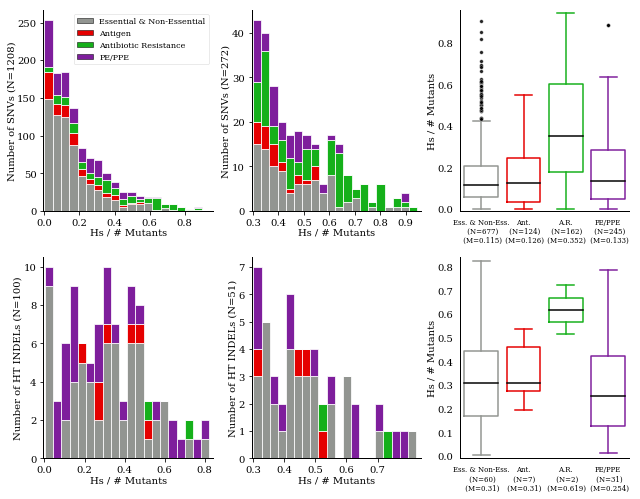

In [248]:
fig = plt.figure(constrained_layout=True)
spec = gridspec.GridSpec(ncols=3, nrows=2, figure=fig, height_ratios = [1,1])
spec.update(wspace=0.23, hspace=0.23) # set the spacing between axes. 

axA = fig.add_subplot(spec[0, 0])
axB = fig.add_subplot(spec[0, 1])
axC = fig.add_subplot(spec[0, 2])

axD = fig.add_subplot(spec[1, 0])
axE = fig.add_subplot(spec[1, 1])
axF = fig.add_subplot(spec[1, 2])

fig_SNV_RCR_A(axA)
fig_SNV_RCR_B(axB)
fig_SNV_RCR_C(axC)

fig_INDEL_HT_RCR_G(axD)
fig_INDEL_HT_RCR_H(axE)
fig_INDEL_HT_RCR_I(axF)

fig = plt.gcf()
fig.set_size_inches(10.5, 8.25)
fig.tight_layout()

file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/for publication/RCR_plots.pdf'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/for publication/RCR_plots.png'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = False)

plt.show()

#### Main Figure for SNVs & non-HT INDELs

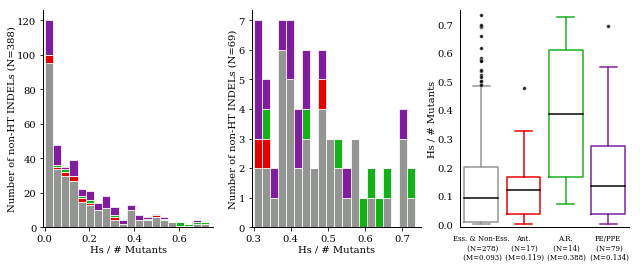

In [250]:
fig = plt.figure(constrained_layout=True)
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig, height_ratios = [1])
spec.update(wspace=0.23, hspace=0.23) # set the spacing between axes. 

axA = fig.add_subplot(spec[0, 0])
axB = fig.add_subplot(spec[0, 1])
axC = fig.add_subplot(spec[0, 2])

fig_INDEL_non_HT_RCR_D(axA)
fig_INDEL_non_HT_RCR_E(axB)
fig_INDEL_non_HT_RCR_F(axC)

fig = plt.gcf()
fig.set_size_inches(10.5, 4.0)
fig.tight_layout()

file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/for publication/RCR_plots_supplement.pdf'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/for publication/RCR_plots_supplement.png'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = False)

plt.show()